In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [41]:
gen2019 = pd.read_csv('data_generacion/estructura-generacion_2019.csv', encoding='latin1').T
gen2020 = pd.read_csv('data_generacion/estructura-generacion_2020.csv', encoding='latin1').T
gen2021 = pd.read_csv('data_generacion/estructura-generacion_2021.csv', encoding='latin1').T
gen2022 = pd.read_csv('data_generacion/estructura-generacion_2022.csv', encoding='latin1').T
gen2023 = pd.read_csv('data_generacion/estructura-generacion_2023.csv', encoding='latin1').T

In [42]:
def limpiar_dataframe(df):
    # Copiar el DataFrame para evitar modificar el original
    df_limpiado = df.copy()

    # Establecer los nombres de columna a partir de la primera fila y eliminar esa fila
    df_limpiado.columns = df_limpiado.iloc[0]
    df_limpiado = df_limpiado.drop(df_limpiado.index[0])

    # Contar los valores nulos en cada columna
    num_nulls = df_limpiado.isnull().sum()

    # Obtener las columnas con más de 10 valores nulos
    columns_to_drop = num_nulls[num_nulls > 10].index

    # Eliminar las columnas del DataFrame
    df_limpiado = df_limpiado.drop(columns_to_drop, axis=1)

    # Quitarle el título a la columna
    df_limpiado.columns.name = None

    #Seleccionar las columnas deseadas
    columnas_deseadas = ['Fecha','Hidráulica',
       'Turbinación bombeo', 'Nuclear', 'Carbón',
       'Motores diésel', 'Turbina de gas', 'Turbina de vapor',
       'Ciclo combinado', 'Hidroeólica', 'Eólica', 'Solar fotovoltaica',
       'Solar térmica', 'Otras renovables', 'Cogeneración',
       'Residuos no renovables', 'Residuos renovables', 'Generación total']
    df_limpiado = df_limpiado.loc[:, columnas_deseadas]

    #Lista de columnas a modificar
    columnas = ['Hidráulica',
       'Turbinación bombeo', 'Nuclear', 'Carbón',
       'Motores diésel', 'Turbina de gas', 'Turbina de vapor',
       'Ciclo combinado', 'Hidroeólica', 'Eólica', 'Solar fotovoltaica',
       'Solar térmica', 'Otras renovables', 'Cogeneración',
       'Residuos no renovables', 'Residuos renovables', 'Generación total']

    # Reemplazar la coma por un punto y convertir a tipo float
    for columna in columnas:
        df_limpiado[columna] = df_limpiado[columna].str.replace(',', '.').astype(float)

    # Resetear el índice
    df_limpiado = df_limpiado.reset_index(drop=True)

    return df_limpiado


In [43]:

gen2020 = limpiar_dataframe(gen2020)
gen2021 = limpiar_dataframe(gen2021)
gen2022 = limpiar_dataframe(gen2022)
gen2023 = limpiar_dataframe(gen2023)


In [44]:
generadas = pd.concat([gen2020, gen2021, gen2022, gen2023], ignore_index=True)
generadas['Fecha'] = pd.to_datetime(generadas['Fecha'], format='%d/%m/%Y')
generadas = generadas.drop('Generación total', axis=1)

In [45]:
spot = pd.read_csv('clean_data/euaspot.csv')
spot = spot.drop('Unnamed: 0', axis=1)

# Convertir la columna "Date" a datetime
spot['date'] = pd.to_datetime(spot['date'])

# Filtrar los valores a partir de 2020
spot = spot[spot['date'].dt.year >= 2020]

spot = spot.drop(columns=['datetime', 'mes', 'dia', 'week', 'year'])
spot.head()


,value,date,weekend
2192,39.995000,2020-01-01,0
2193,39.506250,2020-01-02,0
2194,35.670833,2020-01-03,0
2195,38.175417,2020-01-04,1
2196,42.166250,2020-01-05,1


In [46]:
# Unir los DataFrames generadas y spot por las columnas Fecha y date
merged_df = generadas.merge(spot, left_on='Fecha', right_on='date')

# Eliminar la columna adicional "date"
merged_df = merged_df.drop('date', axis=1)


In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 0 to 1244
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha                   1245 non-null   datetime64[ns]
 1   Hidráulica              1245 non-null   float64       
 2   Turbinación bombeo      1245 non-null   float64       
 3   Nuclear                 1245 non-null   float64       
 4   Carbón                  1245 non-null   float64       
 5   Motores diésel          1245 non-null   float64       
 6   Turbina de gas          1245 non-null   float64       
 7   Turbina de vapor        1245 non-null   float64       
 8   Ciclo combinado         1245 non-null   float64       
 9   Hidroeólica             1245 non-null   float64       
 10  Eólica                  1245 non-null   float64       
 11  Solar fotovoltaica      1245 non-null   float64       
 12  Solar térmica           1245 non-null   float64 

Quitar valores negativo y ponerlos en 0

In [52]:
# Obtener las columnas excepto "Fecha"
columnas_reemplazo = merged_df.columns[merged_df.columns != 'Fecha']

# Reemplazar los valores negativos por cero en las columnas seleccionadas
merged_df[columnas_reemplazo] = merged_df[columnas_reemplazo].apply(lambda x: x.clip(lower=0))

In [53]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hidráulica,1245.0,71.822508,35.089359,12.741650,45.583552,64.629745,90.539999,191.711084
Turbinación bombeo,1245.0,9.220730,5.878470,0.000000,4.655110,8.232679,12.514453,31.838341
Nuclear,1245.0,151.526113,21.108377,89.177886,142.464889,164.806323,168.991421,171.217822
Carbón,1245.0,15.567394,8.537512,0.000000,9.299820,13.302298,20.270780,47.491696
Motores diésel,1245.0,6.743470,0.959304,4.548505,6.069976,6.690593,7.436574,9.566563
Turbina de gas,1245.0,1.414288,0.798943,0.090346,0.840614,1.293854,1.839442,4.766571
Turbina de vapor,1245.0,3.380518,0.943370,0.563573,2.858800,3.429634,4.017280,6.034822
Ciclo combinado,1245.0,138.653149,76.623848,33.657933,79.500079,120.036035,178.543988,396.453645
Hidroeólica,1245.0,0.058838,0.044827,0.000000,0.018983,0.049655,0.095355,0.155042
Eólica,1245.0,165.043680,85.165924,20.866063,98.495433,148.377666,216.156806,430.064376


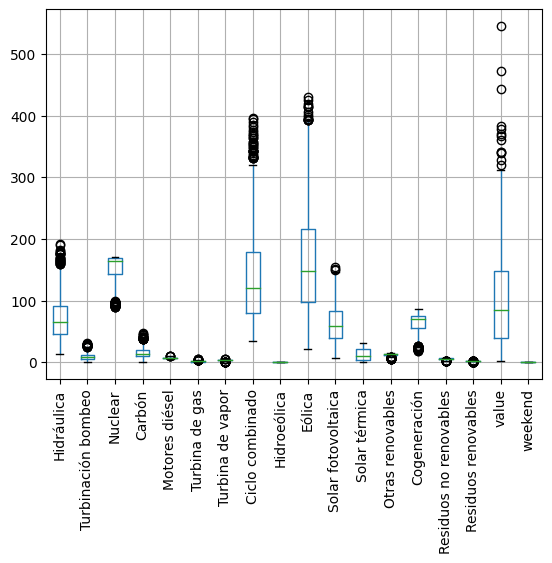

In [57]:
merged_df.boxplot()

# Inclinar las etiquetas del eje x
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

C:\Users\river\AppData\Local\Temp\ipykernel_20696\1644488359.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(merged_df.corr(), dtype=bool))
C:\Users\river\AppData\Local\Temp\ipykernel_20696\1644488359.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(),


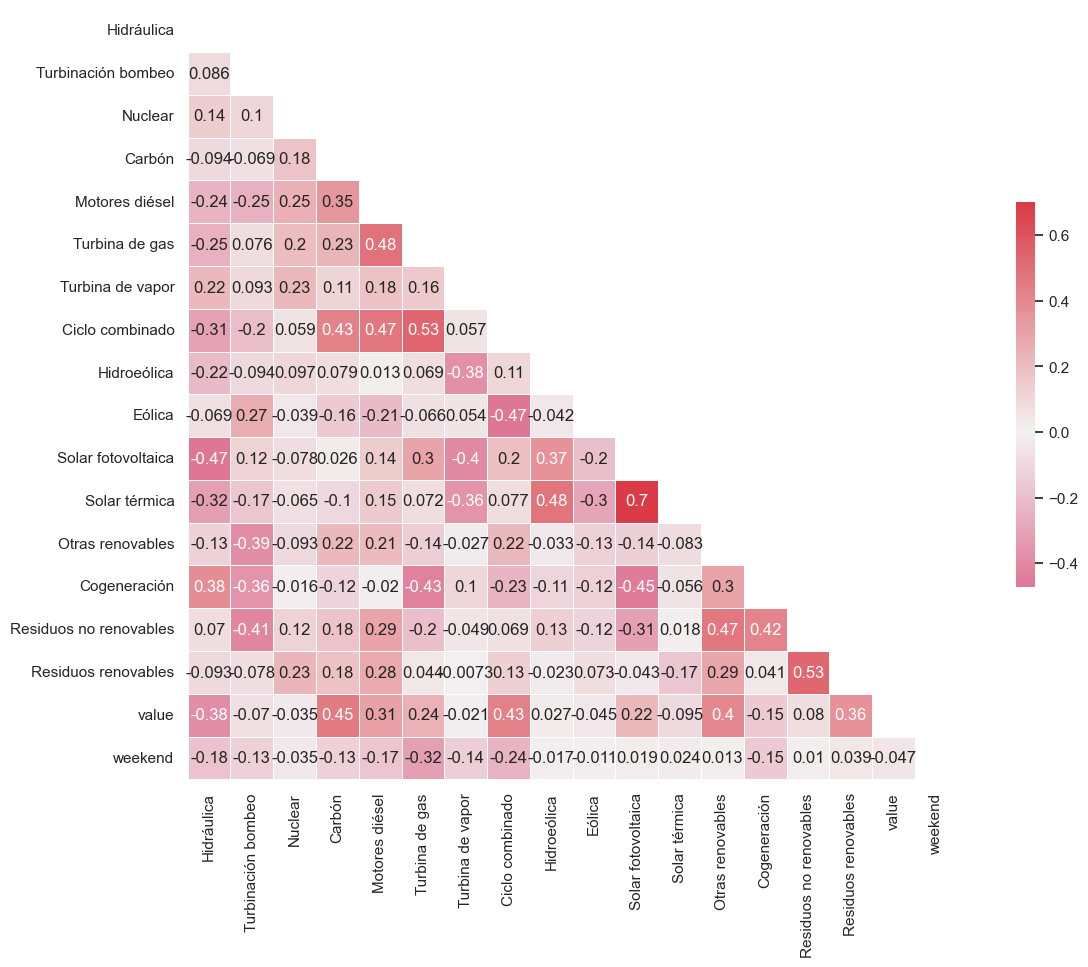

In [59]:
# buscando colinealidad

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(merged_df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(merged_df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [63]:
# Crear una copia del DataFrame original
copia_df = merged_df.copy()

# Crear una nueva columna en la copia del DataFrame con la suma de las columnas deseadas
copia_df['Total renovables'] = merged_df['Hidráulica'] + merged_df['Hidroeólica'] + merged_df['Eólica'] + merged_df['Solar fotovoltaica'] + merged_df['Solar térmica'] + merged_df['Otras renovables'] + merged_df['Residuos renovables']

# Eliminar las columnas originales del DataFrame copia
columnas_eliminar = ['Hidráulica', 'Hidroeólica', 'Eólica', 'Solar fotovoltaica', 'Solar térmica', 'Otras renovables', 'Residuos renovables']
copia_df = copia_df.drop(columnas_eliminar, axis=1)




C:\Users\river\AppData\Local\Temp\ipykernel_20696\2099440816.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(copia_df.corr(), dtype=bool))
C:\Users\river\AppData\Local\Temp\ipykernel_20696\2099440816.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(copia_df.corr(),


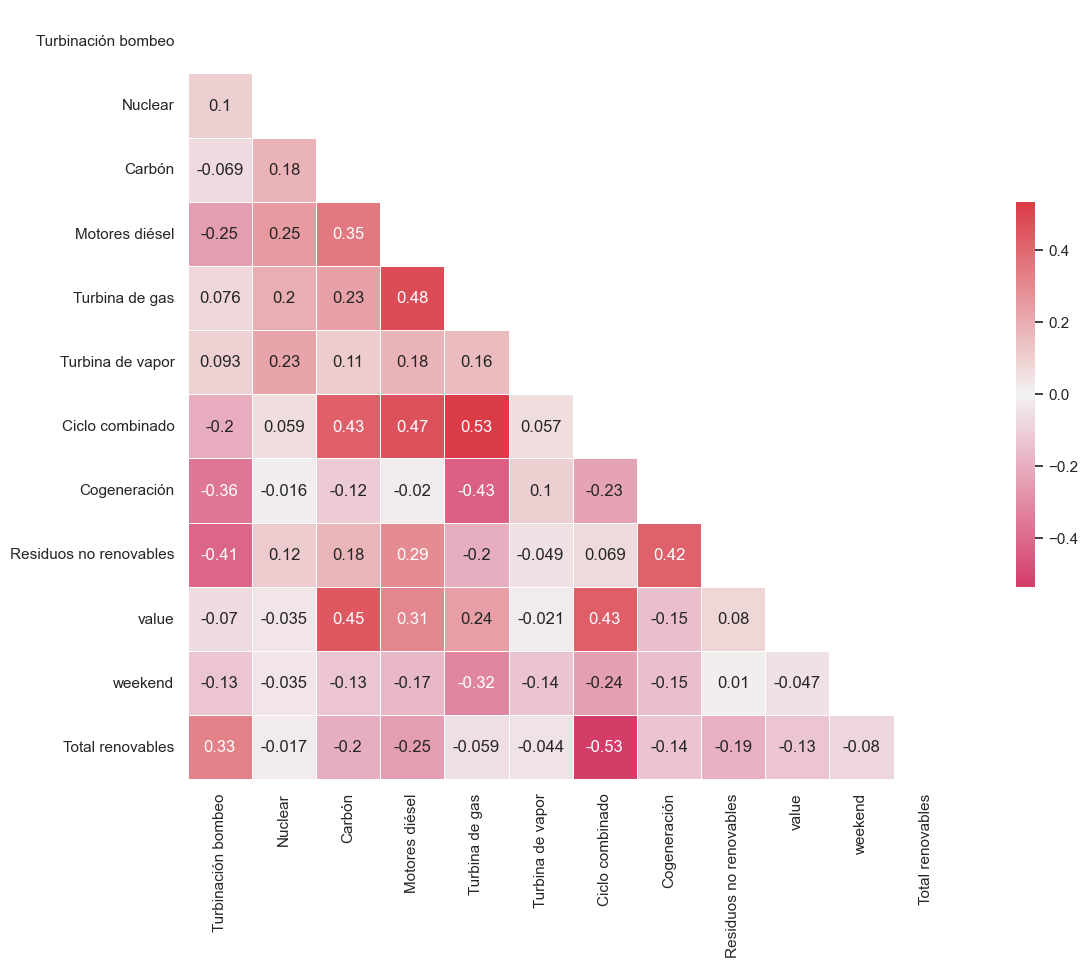

In [64]:
# buscando colinealidad

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(copia_df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(copia_df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});